In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import os 
import matplotlib.pyplot as plt 
import warnings 

In [3]:
os.getcwd()

'C:\\Users\\Kaushik\\OneDrive\\Ivy Data Science Notes\\Python Programs\\Python CW\\Python DS Notebooks'

In [4]:
df=pd.read_csv('C:\\Users\\Kaushik\\OneDrive\\Mphasis Internship\\Datasets\\Telechurn.csv')

In [5]:
df.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

In [7]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>, <AxesSubplot:>]],
      dtype=object)

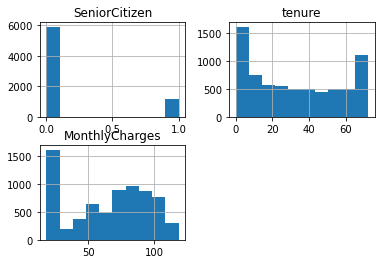

In [8]:
df.hist()

In [12]:
#Renaming senior citizen 1-yes, 0-no
df['SeniorCitizen'].replace([1, 0] , ['yes','no'] , inplace = True)

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>]], dtype=object)

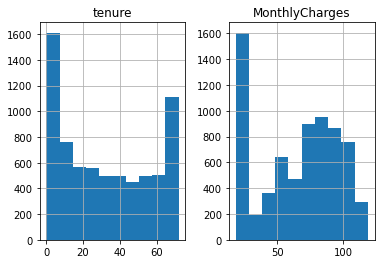

In [13]:
df.hist()

In [14]:
### As the senior citizen columns as being transformed it is no longer being showed as a continuous column 

In [16]:
#Checking null values 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df[['tenure','MonthlyCharges']].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [20]:
df.corr()

,tenure,MonthlyCharges
tenure,1.0000,0.2479
MonthlyCharges,0.2479,1.0000


<AxesSubplot:ylabel='gender'>

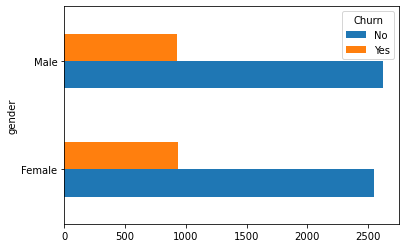

In [33]:
df['COUNT']=1
df.pivot_table(index='gender',columns='Churn',values='COUNT',aggfunc='sum').plot(kind='barh')


In [22]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'COUNT'],
      dtype='object')

<AxesSubplot:ylabel='SeniorCitizen'>

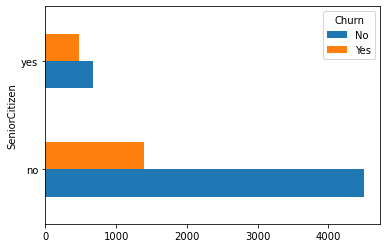

In [25]:
df['COUNT']=1
df.pivot_table(index='SeniorCitizen',columns='Churn',values='COUNT',aggfunc='sum').plot(kind='barh')


<AxesSubplot:xlabel='PhoneService'>

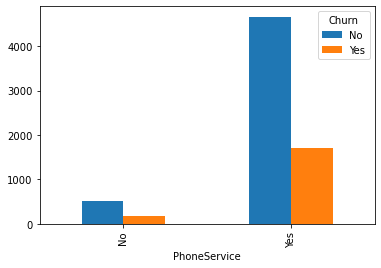

In [48]:
df.pivot_table(index='PhoneService',columns='Churn',values='COUNT',aggfunc='sum').plot(kind='bar')

<AxesSubplot:>

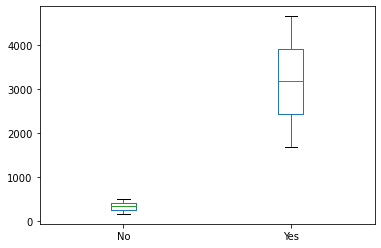

In [46]:
df.pivot_table(index='Churn',columns='PhoneService',values='COUNT',aggfunc='sum').plot(kind='box')

<AxesSubplot:xlabel='PaymentMethod'>

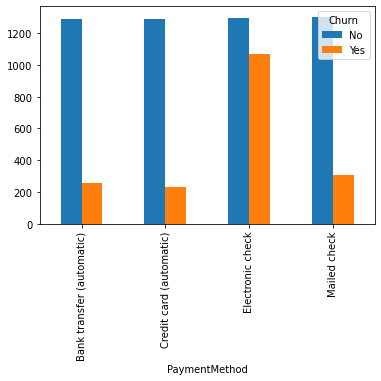

In [51]:
df.pivot_table(index='PaymentMethod',columns='Churn',values='COUNT',aggfunc='sum').plot(kind='bar')

In [49]:
# Pivot Table 
# 1. Group by
# 2. Pivot Table
df['COUNT'] = 1
table = df.pivot_table( index = 'Churn' , columns = 'SeniorCitizen' , values = 'COUNT', aggfunc = 'sum')

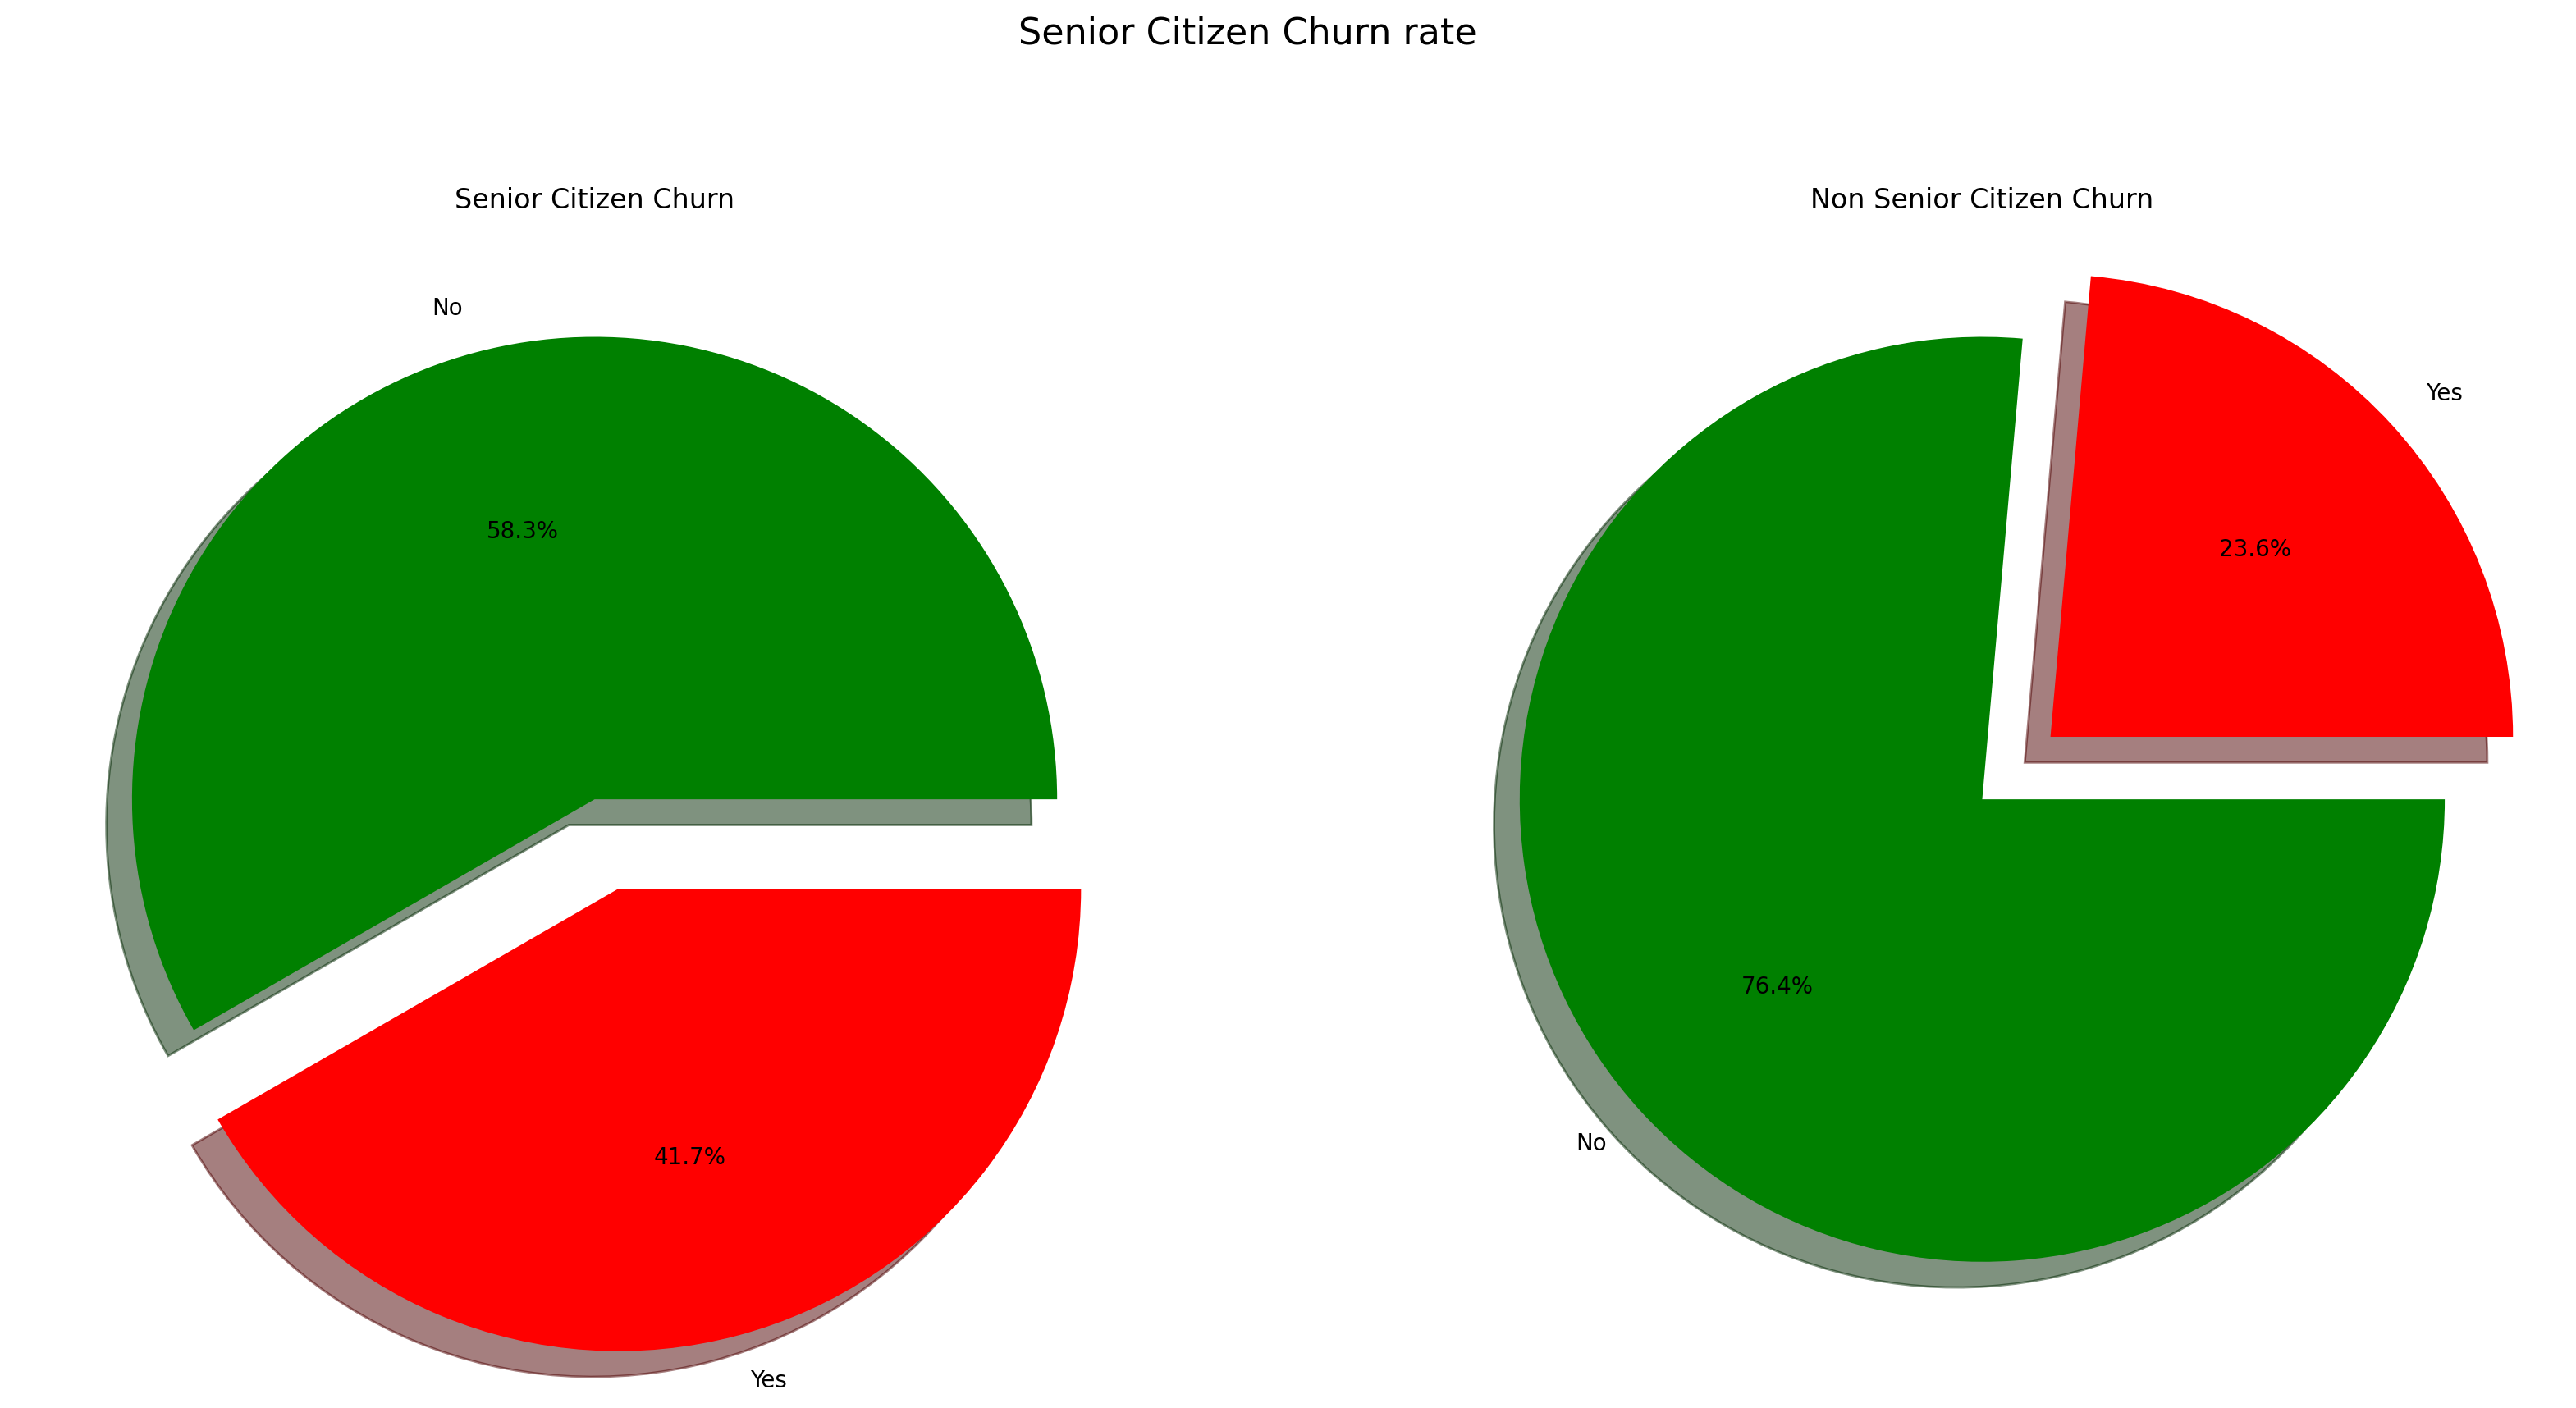

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10) , dpi = 200)

fig.suptitle('Senior Citizen Churn rate', fontsize=16 )
# axs[0].plot -> Line plot
axs[0].pie(table['yes'].values, colors=['g','r'],
           labels=table['yes'].index ,
           autopct='%0.1f%%',
counterclock=True, shadow=True,explode=(0.0,0.2))
axs[0].set_title('Senior Citizen Churn')

axs[1].pie(table['no'].values, colors=['g','r'],
           labels=table['no'].index ,
           autopct='%0.1f%%',
counterclock=False, shadow=True,explode=(0.0,0.2))
axs[1].set_title('Non Senior Citizen Churn')

plt.show()

In [55]:
Y=df['PaymentMethod']
def pie_plot(data ,categories , explode ):
    plt.figure(figsize = (8,8) , dpi = 100)
    colors = ['mediumvioletred','seagreen','dodgerblue','orange']
    plt.pie(data , labels = categories ,
            colors = colors , autopct='%0.1f%%' , shadow = True ,startangle=90 , explode = explode)
    plt.legend()
    plt.show()

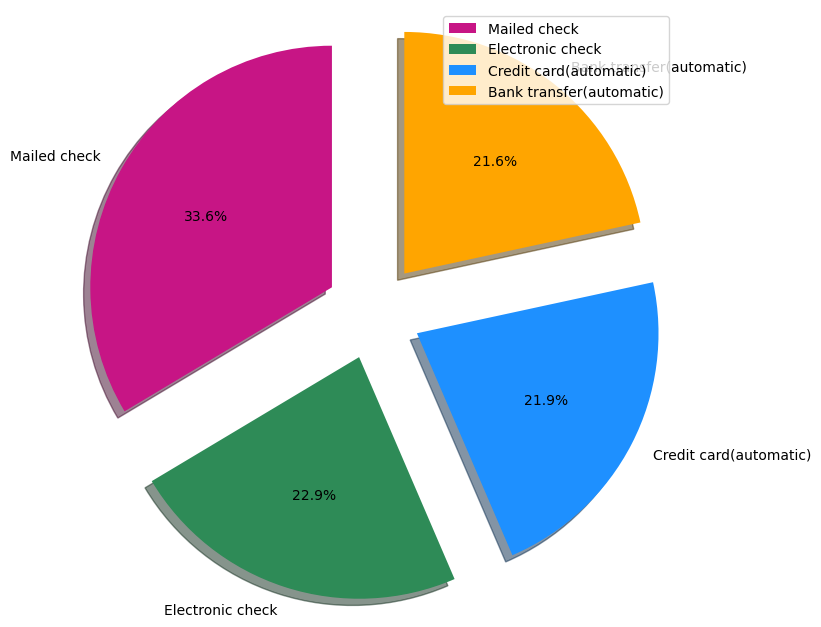

In [59]:
pie_plot(pd.Series(Y).value_counts() ,categories = ['Mailed check','Electronic check','Credit card(automatic)','Bank transfer(automatic)'] ,explode = (0.2,0.2,0.2,0.2)  )